# **K-Mean**

K-Means adalah algoritma unsupervised learning yang digunakan untuk clustering atau pengelompokan data. Artinya, K-Means digunakan untuk membagi kumpulan data ke dalam beberapa kelompok (klaster) berdasarkan kemiripan antar data tanpa perlu label atau target output.

# **Tujuan dan Fungsi**

### 🎯 Tujuan K-Means
Mengelompokkan data ke dalam sejumlah klaster (K) sedemikian rupa sehingga:

- Data dalam satu klaster memiliki kemiripan tinggi (homogen)
- Data antar klaster berbeda satu sama lain (heterogen)
- Meminimalkan inersia (jumlah kuadrat jarak data ke pusat klasternya)

Dengan kata lain, K-Means bertujuan untuk menemukan struktur tersembunyi dalam data dan membantu memahami pola atau segmentasi dalam kumpulan data yang besar.

### 🛠️ Fungsi K-Means
- Clustering (Pengelompokan) Data
Mengelompokkan objek yang serupa ke dalam klaster, tanpa perlu label atau kategori sebelumnya.

- Reduksi Dimensi Visualisasi
Meski data berdimensi tinggi, hasil K-Means bisa direduksi dan divisualisasikan (misalnya dengan PCA).

- Segmentasi Pasar atau Pengguna
Contoh: membagi pelanggan menjadi beberapa grup berdasarkan perilaku pembelian.

- Inisialisasi Model Lain
K-Means kadang digunakan untuk inisialisasi parameter dalam algoritma lain seperti GMM (Gaussian Mixture Models).

- Deteksi Pola dan Anomali
Klaster yang sangat kecil atau data yang jauh dari centroid bisa dianggap sebagai outlier/anomali.

- Pengelompokan Citra atau Warna
Dalam pengolahan citra, K-Means bisa digunakan untuk segmentasi warna.



# **Langkah-langkah Algoritma K-Mean**

1. Tentukan Jumlah Klaster (K)

    pada penjelasan ini akan mencoba membagi data menjadi K = 2, 3, 4 klaster.

2. Inisialisasi Centroid (Titik Pusat Klaster Awal)

    Pilih K titik awal (centroid) secara acak dari data atau dari titik tertentu. Setiap klaster memiliki 1 cenroid

3. Hitung Jarak dari Setiap Titik ke Semua Centroid

    Gunakan rumus jarak Euclidean:


$$
d = \sqrt{(x_1 - c_1)^2 + (x_2 - c_2)^2}
$$


4. Tentukan Klaster Tiap Titik

    Tiap titik akan dimasukkan ke klaster terdekat (jarak terkecil ke centroid).

5. Update Centroid

    Hitung ulang centroid (rata-rata semua titik dalam satu klaster):

$$
C_{\text{new}} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

6. Ulangi Langkah 3–5 Sampai Konvergen
Iterasi terus sampai:

- Tidak ada perubahan klaster,
- Atau perpindahan centroid sangat kecil,
- Atau mencapai jumlah iterasi maksimum.

In [1]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.5 MB/s eta 0:00:00


# Menampilkan data iris

In [11]:
import pymysql
from decimal import Decimal
from tabulate import tabulate

# Konfigurasi koneksi ke database Aiven MySQL
host = "mysql-11e88817-k-mean-irismysql23-112.h.aivencloud.com"
user = "avnadmin"
password = "AVNS_p42y2Yfz3VGZmaWCpvs"
database = "defaultdb"
port = 26858

try:
    # Koneksi ke database MySQL
    conn = pymysql.connect(host=host, user=user, password=password, database=database, port=port)
    cursor = conn.cursor()
    print("Koneksi MySQL berhasil!")

    # Menjalankan query untuk mengambil data dari tabel `mysqliris` dalam schema `iris`
    cursor.execute("SELECT id, Sepal_Length, Sepal_Width, Petal_Length, Petal_Width FROM `mysqliris`.`iris`;")
    rows = cursor.fetchall()

    # Ambil nama kolom
    column_names = [desc[0] for desc in cursor.description]

    # Konversi Decimal ke float
    cleaned_rows = []
    for row in rows:
        cleaned_row = [float(x) if isinstance(x, Decimal) else x for x in row]
        cleaned_rows.append(cleaned_row)

    # Menampilkan dalam bentuk tabel
    print("\nData dari tabel iris:")
    print(tabulate(cleaned_rows, headers=column_names, tablefmt="grid"))

except pymysql.err.OperationalError as e:
    print(f"Error connecting to MySQL: {e}")

finally:
    if 'conn' in locals() and conn.open:
        cursor.close()
        conn.close()


Koneksi MySQL berhasil!

Data dari tabel iris:
+------+----------------+---------------+----------------+---------------+
|   id |   Sepal_Length |   Sepal_Width |   Petal_Length |   Petal_Width |
+======+================+===============+================+===============+
|    1 |            5.1 |           3.5 |            1.4 |           0.2 |
+------+----------------+---------------+----------------+---------------+
|    2 |            4.9 |           3   |            1.4 |           0.2 |
+------+----------------+---------------+----------------+---------------+
|    3 |            4.7 |           3.2 |            1.3 |           0.2 |
+------+----------------+---------------+----------------+---------------+
|    4 |            4.6 |           3.1 |            1.5 |           0.2 |
+------+----------------+---------------+----------------+---------------+
|    5 |            5   |           3.6 |            1.4 |           0.2 |
+------+----------------+---------------+------------

# **Visualisasi K-mean dengan 2 Klaster**

karena pada data iris mempunyai 4 fitur yang akan dihitung jaraknya nantinya dan kita akan mevisualiasasikan dalam 2 dimensi maka kita menggunakan PCA.

### 🧠 Apa itu PCA (Principal Component Analysis)?
PCA adalah metode reduksi dimensi yang digunakan untuk menyederhanakan data berdimensi tinggi tanpa kehilangan informasi penting secara signifikan.

PCA mengubah data ke ruang baru yang disebut principal components — yaitu kombinasi linier dari fitur-fitur asli, diurutkan berdasarkan varian terbesar.

### 🎯 Tujuan PCA
1. Mengurangi Dimensi Data
Mengurangi jumlah fitur, terutama ketika data memiliki banyak kolom, agar:

  - Analisis jadi lebih cepat,
  - Visualisasi lebih mudah (misalnya ke 2D),
  - Menghindari overfitting.

2. Menangkap Informasi Terpenting

    Menjaga sebanyak mungkin variasi (informasi) dari data asli dalam jumlah dimensi yang lebih sedikit.

3. Menghilangkan Redundansi

    Mengurangi kolinearitas antar fitur (fitur yang saling berkorelasi).

### ⚙️ Cara Kerja PCA (Langkah-Langkah)
1. Standardisasi Data
Agar semua fitur berada dalam skala yang sama (misalnya mean = 0, std = 1).
Contoh: StandardScaler di Scikit-Learn.

2. Hitung Matriks Kovarians
Mengukur bagaimana fitur-fitur berhubungan satu sama lain:

$$
\text{Cov}(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

Penjelasan:
- $
\text{Cov}(X, Y)
$: Menyatakan kovarians antara dua variabel acak 𝑋 dan 𝑌.

- $
 \frac{1}{n - 1}
$
 : Faktor pembagi, digunakan untuk mendapatkan kovarians sampel (bukan populasi), karena kita biasanya bekerja dengan data sampel. "n − 1" dikenal sebagai derajat kebebasan.

- $
\sum_{i=1}^{n}
$: Penjumlahan dari indeks 𝑖=1 sampai 𝑛.

- $
(x_i - \bar{x})(y_i - \bar{y})
$
: Selisih nilai data 𝑥𝑖 dengan rata-rata 𝑥ˉdari 𝑋.

- $
(y_i - \bar{y})
$ : Selisih nilai data 𝑦𝑖 dengan rata-rata 𝑦ˉ dari 𝑌.

- Perkalian $(x_i - \bar{x})(y_i - \bar{y})**$ mengukur apakah pasangan nilai 𝑥𝑖,𝑦𝑖 sama-sama besar atau kecil relatif terhadap rata-ratanya (positif kovarians), atau salah satunya besar dan satunya kecil (negatif kovarians).

Makna Kovarians:

- Nilai positif → X dan Y cenderung meningkat bersama.
- Nilai negatif → Jika X meningkat, Y cenderung menurun (dan sebaliknya).
- Nilai mendekati nol → Tidak ada hubungan linear yang kuat antara X dan Y.


3. Hitung Eigenvalue dan Eigenvector
- Eigenvector → arah principal components (komponen utama).
- Eigenvalue → seberapa besar varians (informasi) yang ditangkap oleh setiap eigenvector.

4. Pilih Principal Components
- Urutkan eigenvectors berdasarkan eigenvalue (dari besar ke kecil).
- Pilih komponen paling informatif (misal 2 komponen pertama dari total 4 fitur).

###Misal
 data iris punya 4 fitur :
* Petal length
* Petal width
* Sepal length
* Sepal width

Kita gunakan PCA → ubah jadi 2 fitur utama (PC1 dan PC2) → visualisasi jadi 2D, lebih mudah dianalisis dan di-cluster.

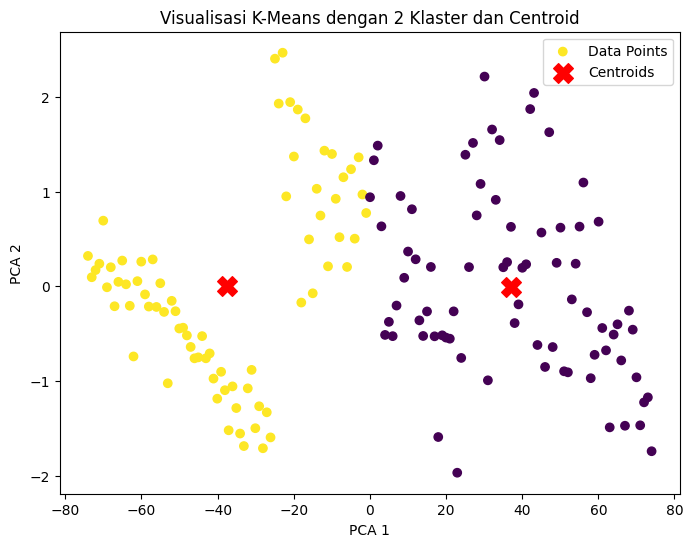

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Misalkan cleaned_rows sudah berisi data yang sudah dibersihkan
val_X = cleaned_rows[1:]  # Hapus header jika ada, dan gunakan data

# KMeans untuk 2 klaster
kmeans = KMeans(n_clusters=2, random_state=42, n_init=5, max_iter=400, tol=0.0001, algorithm='lloyd')
kmeans.fit(val_X)

# Reduksi dimensi dengan PCA ke 2D untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(val_X)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', label='Data Points')

# Menambahkan centroid ke visualisasi
centroids = pca.transform(kmeans.cluster_centers_)  # Transform centroid ke dalam dimensi 2D
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Menambahkan label dan judul
plt.title('Visualisasi K-Means dengan 2 Klaster dan Centroid')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


# **Evaluasi Klastering menggunakan Inersia dengan 2 klaster**

### 📌 Apa itu Inersia dalam Klastering K-Means?
Inersia (atau within-cluster sum of squares / WCSS) adalah ukuran seberapa rapat data dalam suatu klaster mengelompok terhadap pusat klasternya (centroid).

$$
\text{Inersia} = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

- 𝑘 = jumlah klaster
- 𝐶𝑖 = klaster ke-i
- 𝜇𝑖 = centroid klaster ke-i
- 𝑥 = titik data dalam klaster tersebut
- $\|x - \mu_i\|^2$ = jarak kuadrat dari titik ke centroid

### 🎯 Tujuan Penggunaan Inersia
- Mengukur Kualitas Klastering

    Semakin kecil nilai inersia, semakin rapat (kompak) anggota klaster terhadap centroidnya → kualitas klaster lebih baik.

- Menentukan Jumlah Klaster Optimal (Metode Elbow)

    Plot nilai inersia terhadap jumlah klaster (k) dan cari titik “tekuk” (elbow) → menunjukkan nilai k terbaik.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Ambil hanya kolom numerik
val_X = cleaned_rows[1:]
# atau otomatis: val_X = df.select_dtypes(include=[np.number]).values

# KMeans model
k_means_C2 = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=5,
    max_iter=400,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# Latih model
k_means_C2.fit(val_X)

# Ambil label, centroid, dan inertia
labelC2 = k_means_C2.labels_
centroidsC2 = k_means_C2.cluster_centers_
InertiaC2 = k_means_C2.inertia_

print(f"Inertia terbaik (2 klaster): {InertiaC2:.6f}")

Initialization complete
Iteration 0, inertia 104303.62999999996.
Iteration 1, inertia 78700.45538751846.
Iteration 2, inertia 71711.21298447774.
Iteration 3, inertia 69808.79088189783.
Iteration 4, inertia 69352.36676357377.
Iteration 5, inertia 69270.11663697634.
Iteration 6, inertia 69232.75188288289.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 118222.62999999999.
Iteration 1, inertia 82262.54897079.
Iteration 2, inertia 72592.00439130202.
Iteration 3, inertia 69991.62678617793.
Iteration 4, inertia 69447.00835388343.
Iteration 5, inertia 69264.77288916316.
Iteration 6, inertia 69227.43945765762.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 144317.50999999998.
Iteration 1, inertia 69991.62678617793.
Iteration 2, inertia 69447.00835388343.
Iteration 3, inertia 69264.77288916316.
Iteration 4, inertia 69227.43945765762.
Converged at iteration 4: strict convergence.
Initialization complete
Iterat

# **Evaluasi Klastering menggunakan Silhouette dengan 2 klaster**

📌 Apa itu Silhouette dalam Klastering?
Silhouette adalah metode evaluasi kualitas klastering berdasarkan seberapa mirip suatu data dengan klaster-nya sendiri dibandingkan dengan klaster lain.

🧠 Bagaimana Cara Menghitung Nilai Silhouette?
Untuk setiap titik data 𝑖, nilai silhouette 𝑠(𝑖) dihitung dengan:

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

- 𝑎(𝑖)= rata-rata jarak dari titik 𝑖 ke semua titik lain dalam klaster yang sama
- 𝑏(𝑖) = jarak rata-rata terdekat dari titik 𝑖 ke klaster lain yang paling dekat
- 𝑠(𝑖) bernilai antara -1 hingga 1

### 🎯 Tujuan Penggunaan Silhouette
- Mengukur seberapa baik titik berada di dalam klaster-nya
- Membantu menentukan jumlah klaster optimal
- Mendeteksi data yang salah klaster (jika silhouette negatif)

Silhouette Score (2 klaster): 0.620362


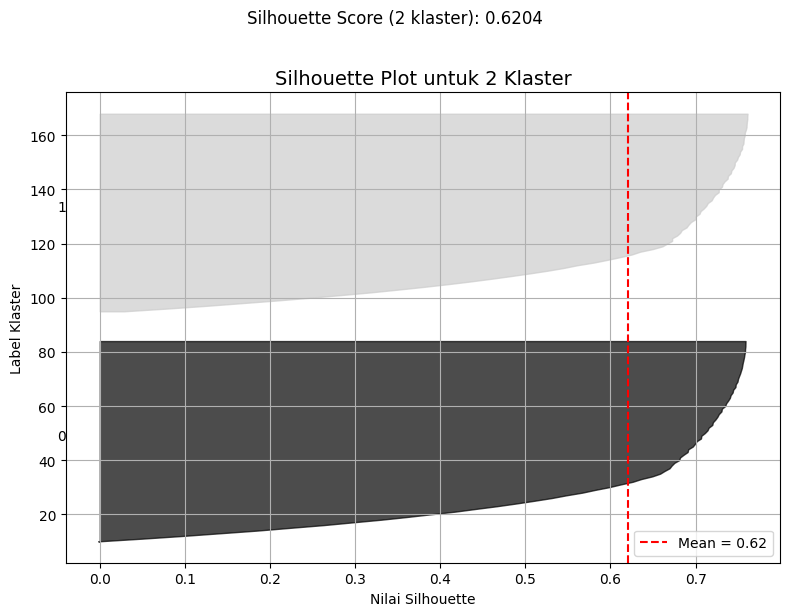

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Data numerik
val_X = cleaned_rows[1:]

# KMeans untuk 2 klaster
k_means_C2 = KMeans(n_clusters=2, random_state=42)
labelC2 = k_means_C2.fit_predict(val_X)
silhouetteC2 = silhouette_score(val_X, labelC2)

# Cetak score
print(f"Silhouette Score (2 klaster): {silhouetteC2:.6f}")

# Hitung silhouette per sampel
sample_silhouette_values = silhouette_samples(val_X, labelC2)

# Plot silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
n_clusters = 2
colors = cm.nipy_spectral(np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labelC2 == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = colors[i]
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Garis rata-rata silhouette
plt.axvline(x=silhouetteC2, color="red", linestyle="--", label=f"Mean = {silhouetteC2:.2f}")

plt.title("Silhouette Plot untuk 2 Klaster", fontsize=14)
plt.suptitle(f"Silhouette Score (2 klaster): {silhouetteC2:.4f}", fontsize=12, y=1.02)

plt.xlabel("Nilai Silhouette")
plt.ylabel("Label Klaster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Visualisasi K-mean dengan 3 Klaster**

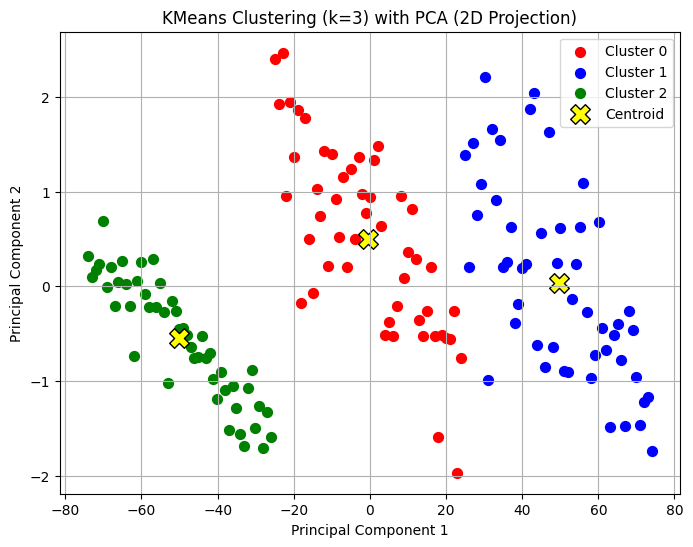

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Ambil fitur numerik
val_X = cleaned_rows[1:]

# KMeans model untuk 3 klaster
k_means_C3 = KMeans(n_clusters=3, random_state=42)
k_means_C3.fit(val_X)

# Ambil label dan centroid
labelC3 = k_means_C3.labels_
centroidsC3 = k_means_C3.cluster_centers_

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
val_X_pca = pca.fit_transform(val_X)
centroidsC3_pca = pca.transform(centroidsC3)

# Plot hasil klaster
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']

for i in range(3):  # Karena k=3
    plt.scatter(val_X_pca[labelC3 == i, 0], val_X_pca[labelC3 == i, 1], s=50, c=colors[i], label=f'Cluster {i}')

# Plot centroid
plt.scatter(centroidsC3_pca[:, 0], centroidsC3_pca[:, 1], s=200, c='yellow', edgecolor='black', marker='X', label='Centroid')

plt.title('KMeans Clustering (k=3) with PCA (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# **Evaluasi Klastering menggunakan Inersia dengan 3 klaster**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Ambil hanya kolom numerik
val_X = cleaned_rows[1:]
# atau otomatis: val_X = df.select_dtypes(include=[np.number]).values

# KMeans model
k_means_C2 = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=5,
    max_iter=400,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# Latih model
k_means_C2.fit(val_X)

# Ambil label, centroid, dan inertia
labelC2 = k_means_C2.labels_
centroidsC2 = k_means_C2.cluster_centers_
InertiaC2 = k_means_C2.inertia_

print(f"Inertia terbaik (3 klaster): {InertiaC2:.6f}")

Initialization complete
Iteration 0, inertia 48348.270000000004.
Iteration 1, inertia 34266.364665357745.
Iteration 2, inertia 32328.786561052602.
Iteration 3, inertia 31563.112492982284.
Iteration 4, inertia 31128.90058710563.
Iteration 5, inertia 30968.264036256136.
Iteration 6, inertia 30852.593041632397.
Iteration 7, inertia 30767.375523650728.
Iteration 8, inertia 30739.432894511934.
Iteration 9, inertia 30714.364767346942.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 46294.590000000004.
Iteration 1, inertia 36630.73637203537.
Iteration 2, inertia 33784.98067130101.
Iteration 3, inertia 32330.626063166572.
Iteration 4, inertia 31580.53392157427.
Iteration 5, inertia 31143.295593689974.
Iteration 6, inertia 30985.769768538004.
Iteration 7, inertia 30868.606335980632.
Iteration 8, inertia 30793.515504602925.
Iteration 9, inertia 30757.72922066947.
Iteration 10, inertia 30732.484257142867.
Converged at iteration 10: strict convergence.
In

# **Evaluasi Klastering menggunakan Silhouette dengan 3 klaster**

Silhouette Score (3 klaster): 0.582222


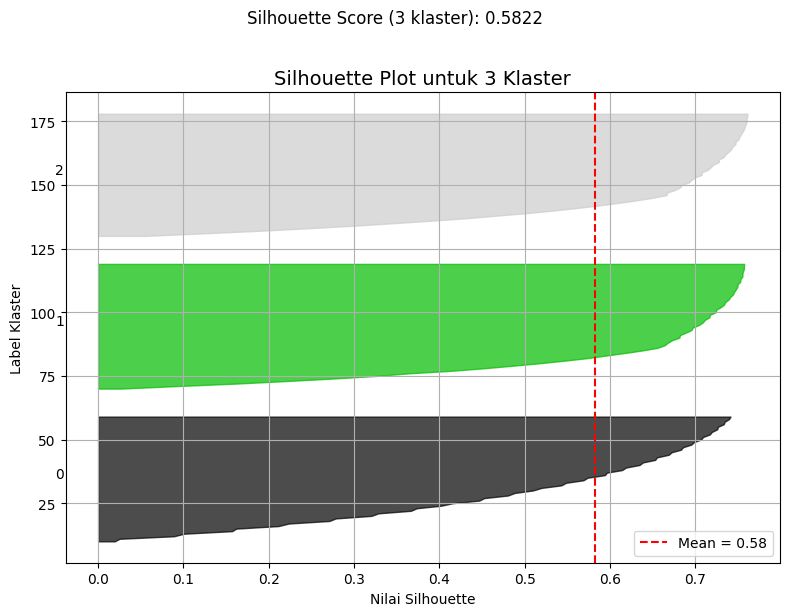

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Data numerik
val_X = cleaned_rows[1:]

# KMeans untuk 3 klaster
k_means_C3 = KMeans(n_clusters=3, random_state=42)
labelC3 = k_means_C3.fit_predict(val_X)
silhouetteC3 = silhouette_score(val_X, labelC3)

# Cetak score
print(f"Silhouette Score (3 klaster): {silhouetteC3:.6f}")

# Hitung silhouette per sampel
sample_silhouette_values = silhouette_samples(val_X, labelC3)

# Plot silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
n_clusters = 3
colors = cm.nipy_spectral(np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labelC3 == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = colors[i]
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Garis rata-rata silhouette
plt.axvline(x=silhouetteC3, color="red", linestyle="--", label=f"Mean = {silhouetteC3:.2f}")

plt.title("Silhouette Plot untuk 3 Klaster", fontsize=14)
plt.suptitle(f"Silhouette Score (3 klaster): {silhouetteC3:.4f}", fontsize=12, y=1.02)

plt.xlabel("Nilai Silhouette")
plt.ylabel("Label Klaster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Visualisasi K-mean dengan 4 Klaster**

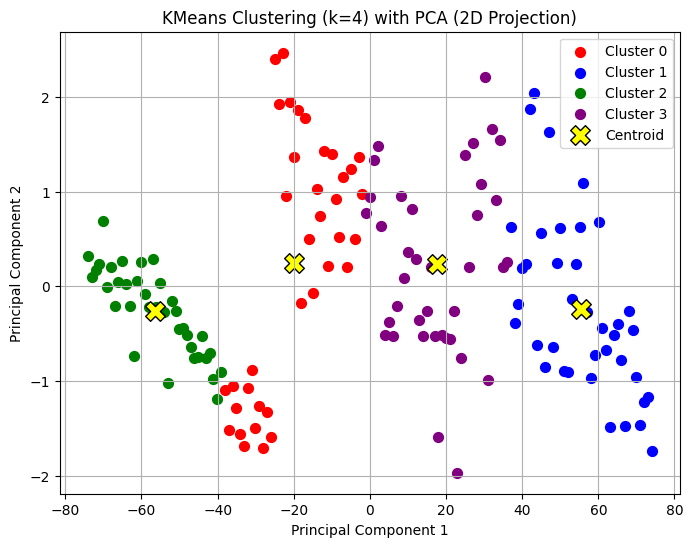

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Ambil fitur numerik
val_X = cleaned_rows[1:]

# KMeans model untuk 4 klaster
k_means_C4 = KMeans(n_clusters=4, random_state=42)
k_means_C4.fit(val_X)

# Ambil label dan centroid
labelC4 = k_means_C4.labels_
centroidsC4 = k_means_C4.cluster_centers_

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
val_X_pca = pca.fit_transform(val_X)
centroidsC4_pca = pca.transform(centroidsC4)

# Plot hasil klaster
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple']

for i in range(4):  # Karena k=4
    plt.scatter(val_X_pca[labelC4 == i, 0], val_X_pca[labelC4 == i, 1], s=50, c=colors[i], label=f'Cluster {i}')

# Plot centroid
plt.scatter(centroidsC4_pca[:, 0], centroidsC4_pca[:, 1], s=200, c='yellow', edgecolor='black', marker='X', label='Centroid')

plt.title('KMeans Clustering (k=4) with PCA (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# **Evaluasi Klastering menggunakan Inersia dengan 4 klaster**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Ambil hanya kolom numerik
val_X = cleaned_rows[1:]
# atau otomatis: val_X = df.select_dtypes(include=[np.number]).values

# KMeans model
k_means_C2 = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=5,
    max_iter=400,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# Latih model
k_means_C2.fit(val_X)

# Ambil label, centroid, dan inertia
labelC2 = k_means_C2.labels_
centroidsC2 = k_means_C2.cluster_centers_
InertiaC2 = k_means_C2.inertia_

print(f"Inertia terbaik (4 klaster): {InertiaC2:.6f}")

Initialization complete
Iteration 0, inertia 21917.860000000004.
Iteration 1, inertia 17712.581189022643.
Iteration 2, inertia 17525.959776328666.
Iteration 3, inertia 17465.84796366668.
Iteration 4, inertia 17447.46477951636.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 21755.27.
Iteration 1, inertia 18814.050138628707.
Iteration 2, inertia 18101.715144613543.
Iteration 3, inertia 17883.58740256916.
Iteration 4, inertia 17724.05354410556.
Iteration 5, inertia 17649.66568806707.
Iteration 6, inertia 17575.894024433448.
Iteration 7, inertia 17557.348461570604.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 20108.129999999994.
Iteration 1, inertia 17654.400075747122.
Iteration 2, inertia 17480.525154529536.
Iteration 3, inertia 17461.498671748664.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 23734.739999999994.
Iteration 1, inertia 18291.907196897828.
It

# **Evaluasi Klastering menggunakan Silhouette dengan 4 klaster**

Silhouette Score (4 klaster): 0.556399


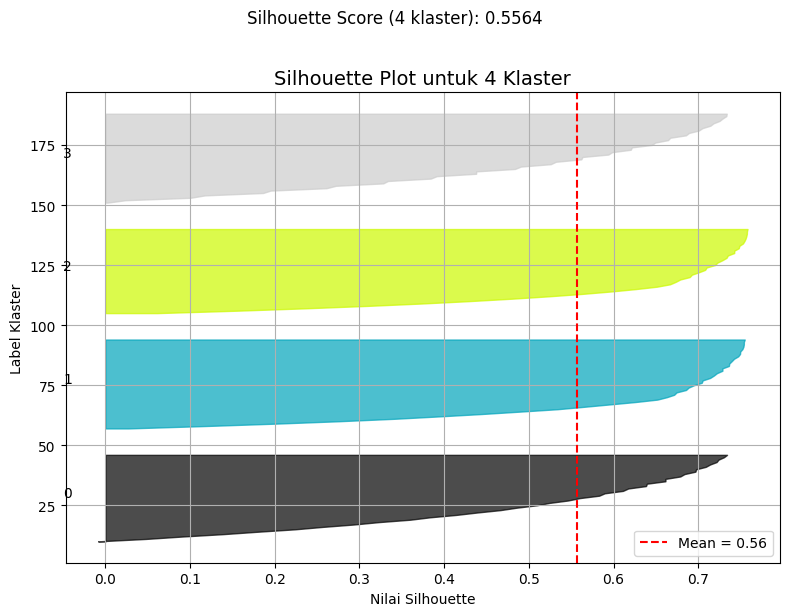

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Data numerik
val_X = cleaned_rows[1:]

# KMeans untuk 4 klaster
k_means_C4 = KMeans(n_clusters=4, random_state=42)
labelC4 = k_means_C4.fit_predict(val_X)
silhouetteC4 = silhouette_score(val_X, labelC4)

# Cetak score
print(f"Silhouette Score (4 klaster): {silhouetteC4:.6f}")

# Hitung silhouette per sampel
sample_silhouette_values = silhouette_samples(val_X, labelC4)

# Plot silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
n_clusters = 4
colors = cm.nipy_spectral(np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labelC4 == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = colors[i]
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Garis rata-rata silhouette
plt.axvline(x=silhouetteC4, color="red", linestyle="--", label=f"Mean = {silhouetteC4:.2f}")

plt.title("Silhouette Plot untuk 4 Klaster", fontsize=14)
plt.suptitle(f"Silhouette Score (4 klaster): {silhouetteC4:.4f}", fontsize=12, y=1.02)

plt.xlabel("Nilai Silhouette")
plt.ylabel("Label Klaster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **EvaluasiK-means dengan Metode Elbow**

setelah kita melakukan klastering dengan 2,3,4 klaster lalu mengevaluasi dengan Inersia sebagaimana perlu mengevaluasi kembali nilai inersianya dengan metode elbow untuk mencari klaster yang paling optimal

### 📌 Apa itu K-Means dengan Metode Elbow?
K-Means adalah algoritma klastering yang membagi data ke dalam beberapa kelompok (klaster) berdasarkan kedekatan antar data.

Metode Elbow adalah cara untuk menentukan jumlah klaster (k) yang optimal dalam algoritma K-Means dengan melihat nilai inersia terhadap jumlah klaster.


### 🎯 Tujuan Metode Elbow
Menentukan jumlah klaster terbaik (k optimal) yang:

- Tidak terlalu sedikit (klaster terlalu besar atau general)
- Tidak terlalu banyak (overfitting atau terlalu spesifik)
- Memberikan pembagian data yang efisien dan bermakna

### 📈 Langkah-langkah K-Means dengan Elbow Method:
1. Pilih rentang jumlah klaster 𝑘=1 sampai 𝑘=𝑛


2. Untuk setiap nilai 𝑘, lakukan:

  - Jalankan K-Means
  - Hitung inertia (jumlah total jarak kuadrat antara titik dan pusat klasternya)

3. Buat plot antara k vs inertia

4. Cari titik "elbow" (siku) di grafik — titik di mana penurunan inersia mulai melambat.

### 🛠️ Kesimpulan
- Elbow method adalah alat bantu visual untuk memilih jumlah klaster terbaik dalam K-Means.
- Gunakan bersama evaluasi lain seperti Silhouette Score agar hasilnya lebih akurat dan andal.
- Ideal untuk data yang tidak diketahui jumlah klasternya dari awal.

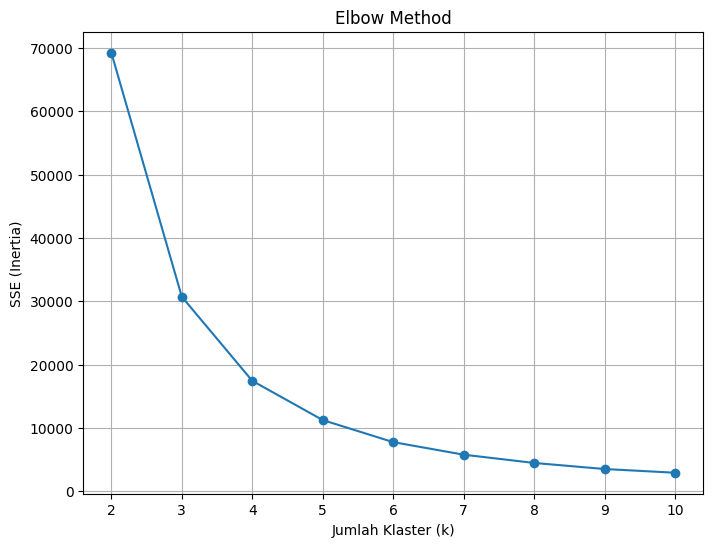

Inertia untuk k=2: 69227.439458
Inertia untuk k=3: 30714.364767
Inertia untuk k=4: 17439.617429
Inertia untuk k=5: 11247.829920
Inertia untuk k=6: 7764.459859
Inertia untuk k=7: 5783.056935
Inertia untuk k=8: 4476.770830
Inertia untuk k=9: 3518.161684
Inertia untuk k=10: 2933.149276


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
val_X = cleaned_rows[1:]

# Siapkan list untuk menyimpan SSE (Inertia) untuk setiap k
sse = []

# Uji untuk k = 2 hingga 10
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5, max_iter=400, tol=0.0001, algorithm='lloyd')
    kmeans.fit(val_X)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)

# Tampilkan plot
plt.show()

# Print inertia terbaik untuk setiap k
for k, inertia in zip(K_range, sse):
    print(f"Inertia untuk k={k}: {inertia:.6f}")


 k      Inertia  Silhouette Score    Keterangan
 2 69232.751883          0.620362              
 3 30714.364767          0.582222 ⇐ Elbow Point
 4 17447.464780          0.556399              


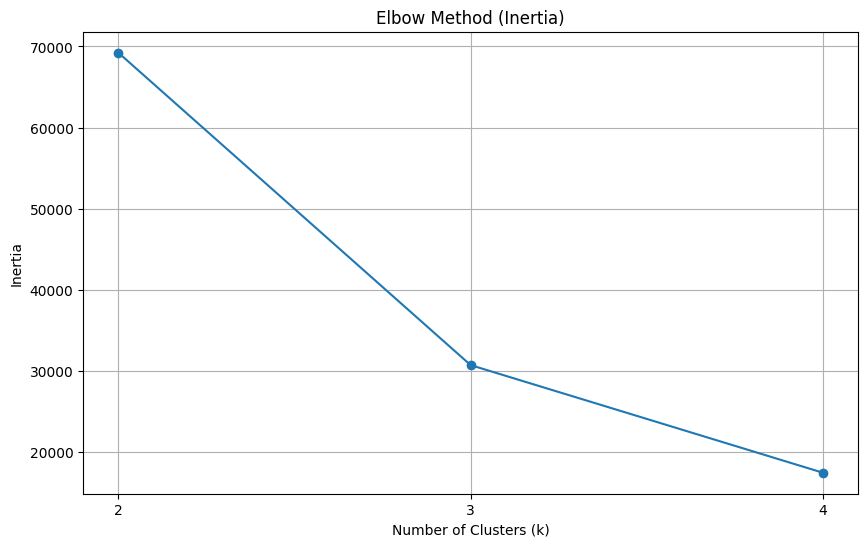

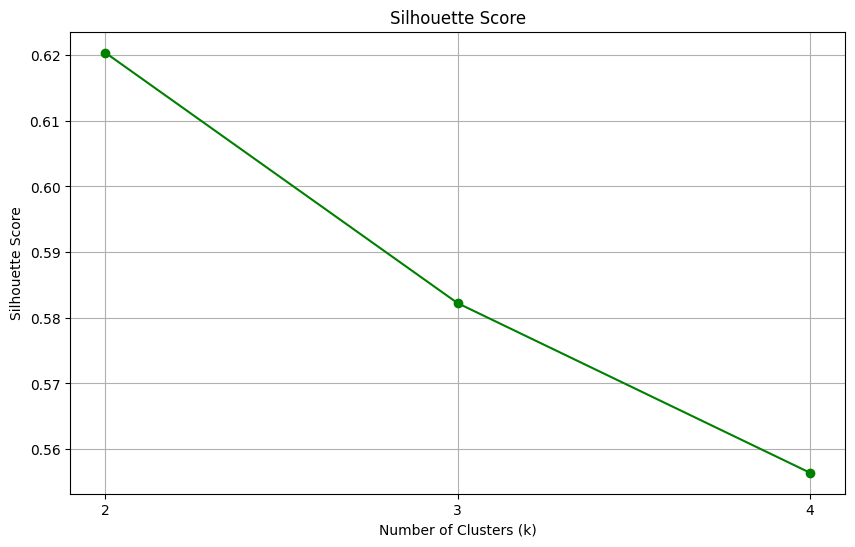

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
val_X = cleaned_rows[1:]

# Definisikan nilai k yang diuji
k_values = [2, 3, 4]
sse = []  # Untuk menyimpan inertia
silhouette_scores = []  # Untuk menyimpan silhouette score

# Hitung inertia dan silhouette score untuk setiap k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(val_X)
    labels = kmeans.labels_
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(val_X, labels))

# Buat DataFrame untuk hasil
result_df = pd.DataFrame({
    'k': k_values,
    'Inertia': sse,
    'Silhouette Score': silhouette_scores
})

# Hitung penurunan SSE (Delta SSE)
result_df['Delta SSE'] = result_df['Inertia'].shift(1) - result_df['Inertia']
result_df['Keterangan'] = ''

# Tentukan elbow point berdasarkan penurunan SSE terbesar
delta_2_to_3 = result_df.loc[1, 'Delta SSE']
delta_3_to_4 = result_df.loc[2, 'Delta SSE']

if delta_2_to_3 > delta_3_to_4:
    result_df.at[1, 'Keterangan'] = '⇐ Elbow Point'  # K=3 adalah elbow point
else:
    result_df.at[2, 'Keterangan'] = '⇐ Elbow Point'  # K=4 adalah elbow point

# Tampilkan tabel hasil
print(result_df[['k', 'Inertia', 'Silhouette Score', 'Keterangan']].to_string(index=False))

# Visualisasi Elbow Method (Inertia)
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### ✅ **Kesimpulan dari Hasil Evaluasi K-Means Clustering**

Berdasarkan hasil evaluasi untuk jumlah klaster $k = 2, 3, 4$ dengan menggunakan **inertia** dan **silhouette score**, diperoleh:

| k | Inertia       | Silhouette Score | Keterangan     |
| - | ------------- | ---------------- | -------------- |
| 2 |  69227.439458 | 0.620362         |                |
| 3 | 30714.364767  | 0.582222         | ⇐ Elbow Point |
| 4 | 17447.464780  | 0.556399         |                |

#### 💡 Kesimpulan:

* **Inertia** mengalami penurunan signifikan dari $k = 2$ ke $k = 3$, namun penurunannya melambat dari $k = 3$ ke $k = 4$.
* **Silhouette Score** terbaik terjadi pada $k = 2$, menunjukkan klaster yang paling terpisah dan kompak.
* Namun, berdasarkan **metode elbow**, nilai $k = 3$ ditandai sebagai titik optimal (Elbow Point), karena setelah itu penurunan inertia tidak signifikan.

🧾 **Maka, jumlah klaster yang paling seimbang antara kompaknya klaster dan efisiensi jumlah klaster adalah $\mathbf{k = 3}$.**


# Fuzzy C-Means
Fuzzy C-Mean (FCM) adalah algoritma klasterisasi dalam pembelajaran mesin yang mana setiap data memiliki derajat keanggotaan pada beberapa klaster sekaligus. FCM menerapkan pendekatan soft clustering, di mana setiap data dapat memiliki derajat keanggotaan antara 0 dan 1 terhadap setiap klaster

In [9]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.5 MB/s eta 0:00:00



🌀 Iterasi 1
Pusat Cluster:
[[5.8930656  3.02150348 3.96373407 1.26500966]
 [5.6996491  3.03769464 3.61289314 1.15983825]
 [5.90334413 3.06863226 3.77799832 1.22017114]]
Objective Function (Jm): 242.2624

🌀 Iterasi 2
Pusat Cluster:
[[5.6173841  3.12533729 3.16772769 0.95810643]
 [6.04539431 3.00052519 4.25100563 1.39762295]
 [5.8012807  3.04530182 3.70710314 1.17738724]]
Objective Function (Jm): 362.8084

🌀 Iterasi 3
Pusat Cluster:
[[6.1723914  2.92126647 4.66718812 1.56748894]
 [5.24591461 3.21953312 2.25226769 0.57228795]
 [5.85822321 3.10734299 3.69573534 1.18108415]]
Objective Function (Jm): 891.2626

🌀 Iterasi 4
Pusat Cluster:
[[5.0676546  3.32783929 1.72594332 0.35166401]
 [6.25367453 2.89160368 4.87572958 1.65985505]
 [5.62618514 3.21420513 3.04797355 0.91177354]]
Objective Function (Jm): 1249.0438

🌀 Iterasi 5
Pusat Cluster:
[[6.25775554 2.88438404 4.89065328 1.66797582]
 [5.03149407 3.37141787 1.58742918 0.29427425]
 [6.16586744 3.04212808 4.42909299 1.49143127]]
Objective Fun

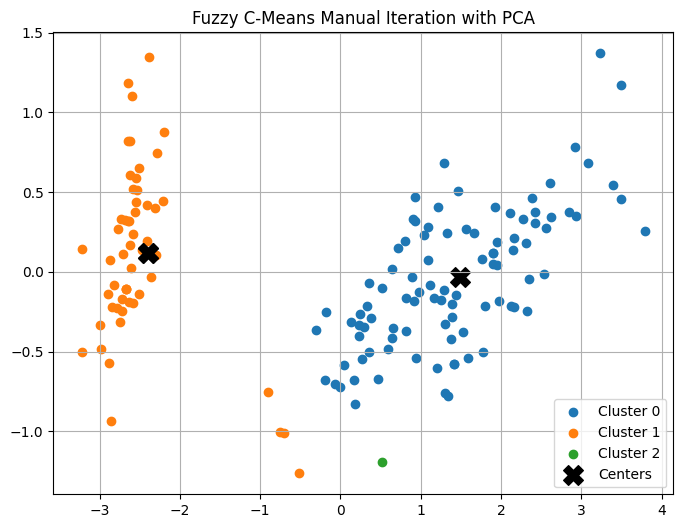

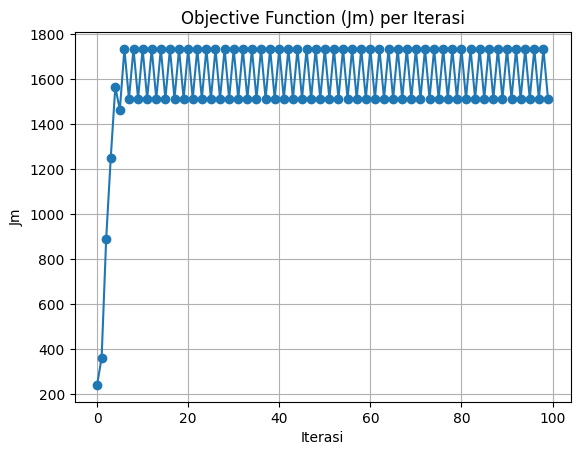


📊 Silhouette Score:
Manual FCM     : 0.3434
scikit-fuzzy   : 0.5493

📄 Tabel Perbandingan (5 Baris Pertama):
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Cluster_Manual  \
0           5.1          3.5           1.4          0.2               1   
1           4.9          3.0           1.4          0.2               1   
2           4.7          3.2           1.3          0.2               1   
3           4.6          3.1           1.5          0.2               1   
4           5.0          3.6           1.4          0.2               1   

   Cluster_SkFuzzy  Cocok  
0                2  False  
1                2  False  
2                2  False  
3                2  False  
4                2  False  

🎯 Persentase Kesamaan Klaster: 29.33%


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz

# ASUMSI: cleaned_rows dan column_names sudah tersedia
df = pd.DataFrame(cleaned_rows, columns=column_names)
X = df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']].values.T  # shape (features, samples)

# Parameter
c = 3                      # jumlah cluster
m = 2.0                    # fuzziness
max_iter = 100
error = 0.0001
N = X.shape[1]             # jumlah data

# Inisialisasi u (keanggotaan) secara acak
u = np.random.dirichlet(np.ones(c), size=N).T  # shape (c, N)

def update_centers(u, X, m):
    um = u ** m
    return (um @ X.T) / np.sum(um, axis=1)[:, None]  # shape (c, features)

def update_membership(X, centers, m):
    dist = np.zeros((c, N))
    for j in range(c):
        dist[j] = np.linalg.norm(X.T - centers[j], axis=1)
    dist = np.fmax(dist, np.finfo(np.float64).eps)
    power = 2 / (m - 1)
    tmp = (dist[:, None, :] / dist[None, :, :]) ** power
    return 1.0 / np.sum(tmp, axis=0)

def calculate_objective(u, X, centers, m):
    dist_sq = np.zeros((c, N))
    for j in range(c):
        dist_sq[j] = np.sum((X.T - centers[j])**2, axis=1)
    return np.sum((u ** m) * dist_sq)

# Iterasi Manual FCM
jm = []
for iteration in range(max_iter):
    centers = update_centers(u, X, m)
    u_new = update_membership(X, centers, m)
    obj = calculate_objective(u_new, X, centers, m)
    jm.append(obj)

    print(f"\n🌀 Iterasi {iteration+1}")
    print(f"Pusat Cluster:\n{centers}")
    print(f"Objective Function (Jm): {obj:.4f}")

    if np.linalg.norm(u_new - u) < error:
        print("\n✅ Konvergen.")
        break
    u = u_new

# Label Manual
labels = np.argmax(u, axis=0)
df['Cluster_Manual'] = labels
for i in range(c):
    df[f'U{i}'] = u[i]

# Visualisasi PCA Manual
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.T)
centers_pca = pca.transform(centers)

plt.figure(figsize=(8, 6))
for i in range(c):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', marker='X', s=200, label='Centers')
plt.title("Fuzzy C-Means Manual Iteration with PCA")
plt.legend()
plt.grid(True)
plt.show()

# Plot Jm over iterations
plt.figure()
plt.plot(jm, marker='o')
plt.title('Objective Function (Jm) per Iterasi')
plt.xlabel('Iterasi')
plt.ylabel('Jm')
plt.grid(True)
plt.show()

# Fuzzy C-Means dari scikit-fuzzy
cntr, u_sklearn, _, _, _, _, _ = fuzz.cluster.cmeans(X, c, m, error, max_iter, seed=42)
labels_sklearn = np.argmax(u_sklearn, axis=0)
df['Cluster_SkFuzzy'] = labels_sklearn

# Evaluasi Silhouette Score
silhouette_manual = silhouette_score(X.T, labels)
silhouette_sklearn = silhouette_score(X.T, labels_sklearn)

print("\n📊 Silhouette Score:")
print(f"Manual FCM     : {silhouette_manual:.4f}")
print(f"scikit-fuzzy   : {silhouette_sklearn:.4f}")

# Tabel perbandingan hasil clustering
comparison_df = df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Cluster_Manual', 'Cluster_SkFuzzy']].copy()
comparison_df['Cocok'] = comparison_df['Cluster_Manual'] == comparison_df['Cluster_SkFuzzy']

print("\n📄 Tabel Perbandingan (5 Baris Pertama):")
print(comparison_df.head())

match_percent = comparison_df['Cocok'].mean() * 100
print(f"\n🎯 Persentase Kesamaan Klaster: {match_percent:.2f}%")


⚙️ Parameter & Data
Jumlah klaster (c): 3

Fuzziness (m): 2

Data (X): Data Iris

Derajat Keanggotaan Awal (U₀):

| Data | u1 (C1) | u2 (C2) | u3 (C3) |
| ---- | ------- | ------- | ------- |
| x1   | 0.5     | 0.3     | 0.2     |
| x2   | 0.6     | 0.3     | 0.1     |
| x3   | 0.7     | 0.2     | 0.1     |
| x4   | 0.2     | 0.3     | 0.5     |
| x5   | 0.1     | 0.3     | 0.6     |


🔁 ITERASI 1
1️⃣ Hitung (uᵢⱼ)ᵐ (kuadrat)
| Data  | u1  | u2  | u3  | u1²      | u2²      | u3²      |
| ----- | --- | --- | --- | -------- | -------- | -------- |
| x1    | 0.5 | 0.3 | 0.2 | 0.25     | 0.09     | 0.04     |
| x2    | 0.6 | 0.3 | 0.1 | 0.36     | 0.09     | 0.01     |
| x3    | 0.7 | 0.2 | 0.1 | 0.49     | 0.04     | 0.01     |
| x4    | 0.2 | 0.3 | 0.5 | 0.04     | 0.09     | 0.25     |
| x5    | 0.1 | 0.3 | 0.6 | 0.01     | 0.09     | 0.36     |
| **Σ** |     |     |     | **1.15** | **0.40** | **0.67** |


2️⃣ Hitung Pusat Klaster (v₁, v₂, v₃)
Rumus pusat klaster:


% Rumus centroid (titik pusat cluster)
$$
v_j = \frac{\sum_{i=1}^n (u_{ij})^m \cdot x_i}{\sum_{i=1}^n (u_{ij})^m}
$$

🔹 $v_1$ (Cluster 1)

\[
\begin{aligned}
x &: 0.25 \times 1 + 0.36 \times 2 + 0.49 \times 3 + 0.04 \times 6 + 0.01 \times 7 \\
&= 0.25 + 0.72 + 1.47 + 0.24 + 0.07 = 2.75 \\
y &: 0.25 \times 2 + 0.36 \times 3 + 0.49 \times 4 + 0.04 \times 7 + 0.01 \times 8 \\
&= 0.50 + 1.08 + 1.96 + 0.28 + 0.08 = 3.90
\end{aligned}
\]

$$
v_1 = \left(\frac{2.75}{1.15}, \frac{3.90}{1.15}\right) \approx (2.39, 3.39)
$$

🔹 $v_2$ (Cluster 2)

\[
\begin{aligned}
x &: 0.09 \times 1 + 0.09 \times 2 + 0.04 \times 3 + 0.09 \times 6 + 0.09 \times 7 \\
&= 0.09 + 0.18 + 0.12 + 0.54 + 0.63 = 1.56 \\
y &: 0.09 \times 2 + 0.09 \times 3 + 0.04 \times 4 + 0.09 \times 7 + 0.09 \times 8 \\
&= 0.18 + 0.27 + 0.16 + 0.63 + 0.72 = 1.96
\end{aligned}
\]

$$
v_2 = \left(\frac{1.56}{0.40}, \frac{1.96}{0.40}\right) = (3.90, 4.90)
$$

🔹 $v_3$ (Cluster 3)

\[
\begin{aligned}
x &: 0.04 \times 1 + 0.01 \times 2 + 0.01 \times 3 + 0.25 \times 6 + 0.36 \times 7 \\
&= 0.04 + 0.02 + 0.03 + 1.50 + 2.52 = 4.11 \\
y &: 0.04 \times 2 + 0.01 \times 3 + 0.01 \times 4 + 0.25 \times 7 + 0.36 \times 8 \\
&= 0.08 + 0.03 + 0.04 + 1.75 + 2.88 = 4.78
\end{aligned}
\]

$$
v_3 = \left(\frac{4.11}{0.67}, \frac{4.78}{0.67}\right) \approx (6.13, 7.13)
$$

\bigskip
\textbf{3️⃣ Hitung Derajat Keanggotaan Baru ($U$)}\\
Rumus:
$$
u_{ij} = \frac{1}{\sum_{k=1}^c \left(\frac{\|x_i - v_j\|}{\|x_i - v_k\|}\right)^{\frac{2}{m-1}}}
$$

Karena \( m=2 \), maka \(\frac{2}{m-1} = 2\).

\bigskip
Contoh untuk \( x_1 = (1,2) \):

\[
\begin{aligned}
\text{Jarak ke } v_1 &\approx \sqrt{(1-2.39)^2 + (2-3.39)^2} = \sqrt{1.93 + 1.93} = \sqrt{3.86} \approx 1.96 \\
\text{Jarak ke } v_2 &\approx \sqrt{(1-3.90)^2 + (2-4.90)^2} = \sqrt{8.41 + 8.41} = \sqrt{16.82} \approx 4.10 \\
\text{Jarak ke } v_3 &\approx \sqrt{(1-6.13)^2 + (2-7.13)^2} = \sqrt{26.32 + 26.32} = \sqrt{52.64} \approx 7.26
\end{aligned}
\]

\
\begin{aligned}
u_{11} &= \frac{1}{1 + \left(\frac{1.96}{4.10}\right)^2 + \left(\frac{1.96}{7.26}\right)^2}
= \frac{1}{1 + 0.228 + 0.073}
= \frac{1}{1.301} \approx 0.768 \\
u_{12} &= \frac{1}{1 + \left(\frac{4.10}{1.96}\right)^2 + \left(\frac{4.10}{7.26}\right)^2}
= \frac{1}{1 + 4.36 + 0.319}
= \frac{1}{5.68} \approx 0.176 \\
u_{13} &= 1 - u_{11} - u_{12} = 1 - 0.768 - 0.176 = 0.056
\end{aligned}


